In [25]:
import numpy as np
import matplotlib.pyplot as plt

# The activation function and it's derivative:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
# The loss function and it's derivative:
def J(x):
    return 1/2*x**2
def d_J(x):
    return x
#The initialisation of the weight W:
def init(dim):# dim denotes the architecture A[N0,N1,..., NL] of the DNN of length L:
    L=len(dim)
    W = {}    
    for h in range(1, L):
        W[f'W{h}'] = np.random.randn(dim[h], dim[h-1])
    return W
# The F-propagation of the data X through the weight W:
def F_prop(X, W): 
    L=len(W)
    Y_h = {}
    X_h = {'X0':X.T}   
    for h in range(1, L+1):        
        Y_h[f'Y{h}'] = np.dot(W[f'W{h}'], X_h[f'X{h-1}'])
        X_h[f'X{h}'] = sigmoid(Y_h[f'Y{h}'])        
    return Y_h, X_h
# The F-adjoint propagation of the data (X,y) through the weight W:
def F_star_prop(X,y, W, dJ):
    L=len(W)
    Y_h , X_h = F_prop(X, W)   
    X_star={f'X*{L}':dJ(X_h[f'X{L}']-y)}
    Y_star={}
    for h in reversed(range(1, L+1)):        
        Y_star[f'Y*{h}'] =X_star[f'X*{h}'] *(d_sigmoid(Y_h[f'Y{h}']))
        X_star[f'X*{h-1}']=W[f'W{h}'].T.dot(Y_star[f'Y*{h}'])
    return X_star, Y_star
# The gradient update, with respect to he weight W, of the data (X,y):
def update(X,y,W, dJ, learning_rate = 0.4):
    L=len(W)
    for h in range(1, L+1):
        Y_h , X_h = F_prop(X, W)
        X_star, Y_star=F_star_prop(X,Y, W, dJ)        
        W[f'W{h}'] += - learning_rate *np.dot(Y_star[f'Y*{h}'],X_h[f'X{h-1}'].T)
    return W


In [26]:
# Example of application:
dim = [2,3,1]
X=np.array([[0,1]])
y=np.array([[1]])
W=init(dim)
W

{'W1': array([[ 0.22644681,  3.07919409],
        [-0.97788738,  0.73394386],
        [ 0.06189212, -0.75462589]]),
 'W2': array([[-0.56326747,  0.98615733, -0.37214427]])}

In [27]:
F_prop(X, W)

({'Y1': array([[ 3.07919409],
         [ 0.73394386],
         [-0.75462589]]),
  'Y2': array([[0.00880151]])},
 {'X0': array([[0],
         [1]]),
  'X1': array([[0.95602632],
         [0.67567013],
         [0.31981418]]),
  'X2': array([[0.50220036]])})

In [28]:
F_star_prop(X,y, W, d_J)

({'X*2': array([[-0.49779964]]),
  'X*1': array([[ 0.07009723],
         [-0.12272481],
         [ 0.04631242]]),
  'X*0': array([[ 0.02759007],
         [-0.01826705]])},
 {'Y*2': array([[-0.1244475]]),
  'Y*1': array([[ 0.00294689],
         [-0.02689392],
         [ 0.01007448]])})

In [29]:
def neural_network(X, Y, dim, lossftion, learning_rate, iter, print_cost=True):
    W = init(dim)
    L=len(W)
    train_loss = [ ]
    train_acc = [ ]
    costs = []
    for i in range(iter):
        _ , X_h = F_prop(X, W)        
        cost = lossftion(Y -X_h[f'X{L}'])
        W = update(X,Y,W,d_J, learning_rate )
        if print_cost and i % 10 == 0:
            print("Loss after iteration %i: %f" % (i, cost))
            if i % 5 == 0:
                costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('Loss')
    plt.xlabel('iterations (per 100s)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return print('W=', W)

Loss after iteration 0: 0.098163
Loss after iteration 10: 0.065066
Loss after iteration 20: 0.044875
Loss after iteration 30: 0.032357
Loss after iteration 40: 0.024327
Loss after iteration 50: 0.018966
Loss after iteration 60: 0.015244
Loss after iteration 70: 0.012566
Loss after iteration 80: 0.010578
Loss after iteration 90: 0.009061


/tmp/ipykernel_25221/3226614099.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Loss after iteration %i: %f" % (i, cost))


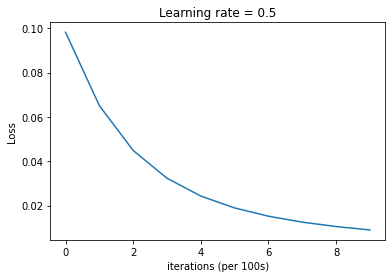

W= {'W1': array([[-0.35178804, -1.34559872],
       [ 1.77486148,  0.8047119 ],
       [-1.54181106,  0.40910295]]), 'W2': array([[1.01952561, 1.19875019, 1.50171241]])}


In [30]:
dim = [2,3,1]
X=np.array([[0,1]])
Y=np.array([[1]])
neural_network(X, Y,  dim, J, 0.5,  100, print_cost=True)